In [1]:
import os
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [3]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [4]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

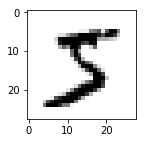

In [5]:
plot_image(x_Train[0])

In [9]:
x_Train.shape

(60000, 28, 28)

In [10]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [11]:
x_Train4D.shape

(60000, 28, 28, 1)

In [12]:
# 0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [13]:
# Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [14]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
# Model Structure
model = Sequential()
# Create CN layer 1  
model.add(Conv2D(filters=16,  kernel_size=(5,5),  padding='same',  input_shape=(28,28,1),  activation='relu')) 
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Create CN layer 2  
model.add(Conv2D(filters=36,  kernel_size=(5,5),  padding='same',  input_shape=(28,28,1),  activation='relu'))
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
# Add Dropout layer  
model.add(Dropout(0.25)) 
# Add Flatten layer 
model.add(Flatten())
# Add Hidden layer 
model.add(Dense(512, activation='relu'))  
model.add(Dropout(0.25))
# Add Hidden layer 
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.25))
# Add Hidden layer 
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  
# Add Output layer 
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [20]:
# Train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history=model.fit(x_Train4D_normalize, y_TrainOneHot, validation_split=0.2,epochs=20, batch_size=130, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 123us/step - loss: 0.0167 - accuracy: 0.9961 - val_loss: 0.0390 - val_accuracy: 0.9916
Epoch 2/20
48000/48000 [==============================] - 6s 125us/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0516 - val_accuracy: 0.9918
Epoch 3/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0398 - val_accuracy: 0.9928
Epoch 4/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0476 - val_accuracy: 0.9922
Epoch 5/20
48000/48000 [==============================] - 5s 111us/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 0.0426 - val_accuracy: 0.9912
Epoch 6/20
48000/48000 [==============================] - 5s 112us/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0456 - val_accuracy: 0.9912
Epoch 7/20
48000/48000 [==============================] - 5s 1

In [21]:
# Score
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 87us/step


0.9933000206947327

In [41]:
# Save model
model.save('./Mnist.h5')

In [22]:
model = load_model('Mnist_0.51%_Jack_Lai_Group6.h5')

In [23]:
# Score
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 1s 102us/step


0.9948999881744385